<a href="https://colab.research.google.com/github/Niha-ha/Boston_house_price_prediction/blob/main/Boston_House_Rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries--
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
path = '/content/drive/MyDrive/boston_house_prices.csv'
df = pd.read_csv(path)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
#using shape method to see the dimension of the dataframe--
df.shape

(506, 14)

In [23]:
#checking the datatype--
df.dtypes

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,int64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,int64
TAX,int64


In [ ]:
#check the column name--
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
#check the unique value for each column to determine if the feature is identifier, catagorical, continuous or constant??


df.nunique()


,0
CRIM,504
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,356
DIS,412
RAD,9
TAX,66


In [ ]:
#checking for missing value--


df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
#rows with missing values--


df[df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [ ]:
#viewing quick statistical summery--


df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#finding the correlation between variables--


correlation = df.corr()     #calculate correlation matrix
correlation.shape           #shows the dimension of the correlation matri

(14, 14)

<Axes: >

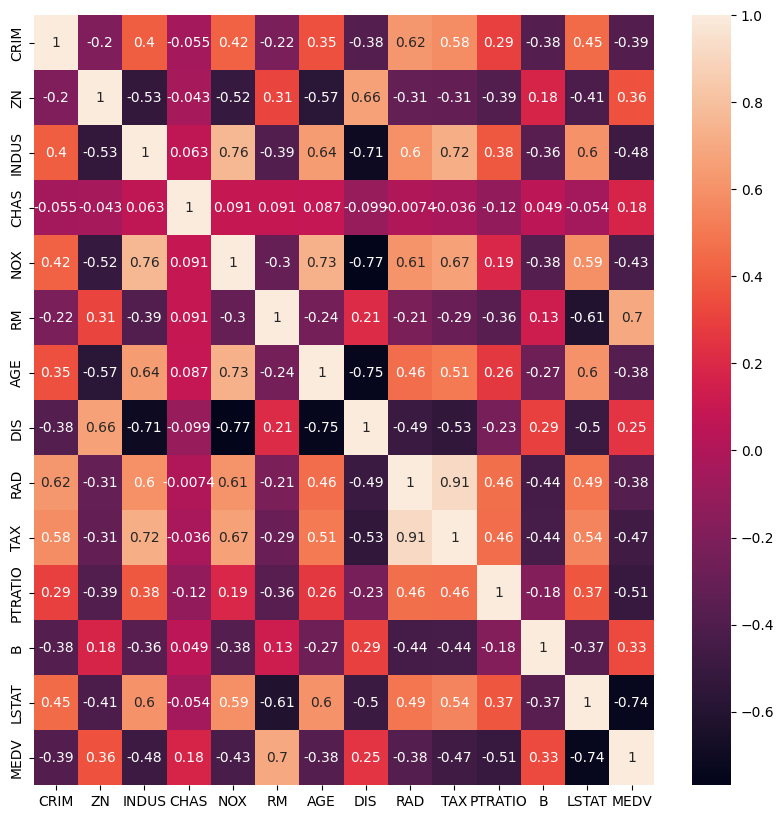

In [ ]:
#plot a heatmap to visulize the correlation matrix--
plt.figure(figsize=(10,10))                  #sets the plot size 10 inches by 10 inches
sns.heatmap(correlation, annot=True)         #represent a heatmap of "correlation" and annotate each cell with the correlation value

In [ ]:
#spliting the features(independent variable) and target variable--

X = df.drop(['MEDV'], axis =1)         #storing the features in X
Y = df['MEDV']                         #storing target in Y
print(X, Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [ ]:
#spliting the test and train data--

from sklearn.model_selection import train_test_split                                       #import tain test function from scikit

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  # split the data where train data = 80% remaining for test



In [ ]:
#train the model using linear regression method--


from sklearn.linear_model import LinearRegression
model = LinearRegression()                         #created an empty model
model.fit(X_train, Y_train)                        #trained the model(the model learned the relationship between feature and target)

LinearRegression()

In [ ]:
#value of Y intercept--

model.intercept_              #calculate the value of intercept. (when all other feature is 0)
print(model.intercept_)
print(model.coef_)

30.288948339368694
[-1.12463481e-01  3.00810168e-02  4.07309919e-02  2.78676719e+00
 -1.72406347e+01  4.43248784e+00 -6.23998173e-03 -1.44848504e+00
  2.62113793e-01 -1.06390978e-02 -9.16398679e-01  1.24516469e-02
 -5.09349120e-01]


In [ ]:
#converting the coefficient values to a Dataframe for clear view--

coefficients = pd.DataFrame([X_train.columns, model.coef_])                      #creating a dataframe of coefficients with feature column name and coefficient value
coefficients = coefficients.rename(columns={0:"features", 1:"coefficient"})      #rename the column name of dataframe
coefficients

,features,coefficient,2,3,4,5,6,7,8,9,10,11,12
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,-0.112463,0.030081,0.040731,2.786767,-17.240635,4.432488,-0.00624,-1.448485,0.262114,-0.010639,-0.916399,0.012452,-0.509349


In [19]:
#Model prediction on train data


Y_pred = model.predict(X_train)

In [20]:
# Model Evaluation
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: 0.7508837786732915
Adjusted R^2: 0.7425799046290679
MAE: 3.3151645312220066
MSE: 21.641574096655578
RMSE: 4.652050526021356


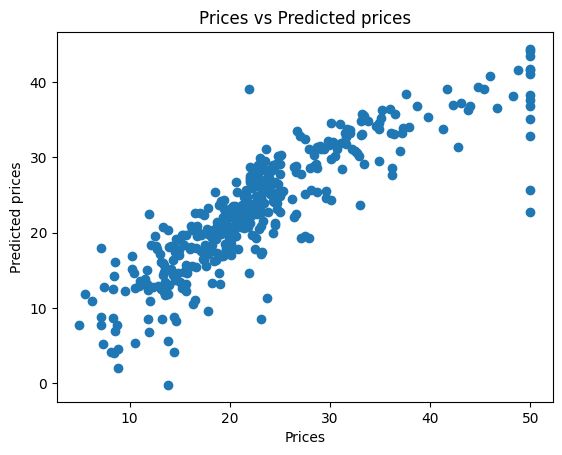

In [25]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

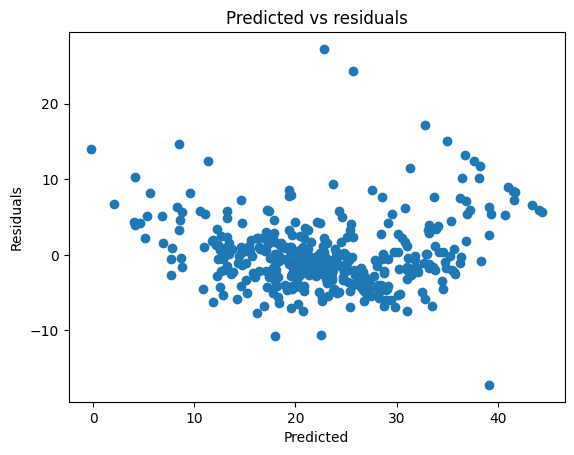

In [26]:
# Checking residuals
plt.scatter(Y_pred,Y_train-Y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

/tmp/ipython-input-28-3949498600.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_train-Y_pred)


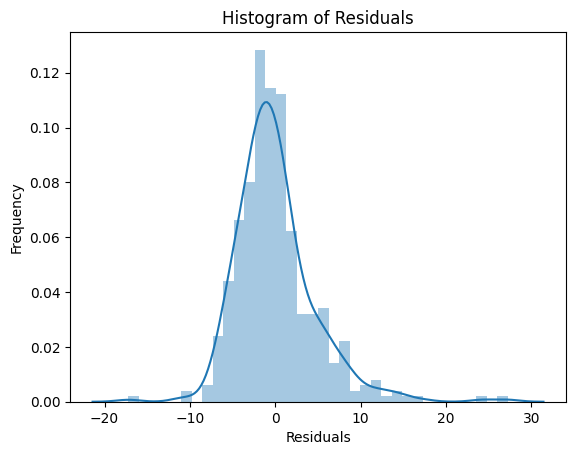

In [28]:
# Checking Normality of errors
sns.distplot(Y_train-Y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [31]:
# Predicting Test data with the model
Y_test_pred = model.predict(X_test)
Y_test_pred

array([29.00108503, 36.03180934, 14.82255381, 25.03889584, 18.7617758 ,
       23.25843874, 17.66106325, 14.33486047, 23.01572366, 20.63232475,
       24.9137504 , 18.63823843, -6.10459473, 21.76184921, 19.24273449,
       26.18610963, 20.65093389,  5.7909294 , 40.49699449, 17.60897981,
       27.25209766, 30.06900481, 11.33334531, 24.15971925, 17.85047566,
       15.83640193, 22.79011378, 14.52979672, 22.44033031, 19.19711348,
       22.43960684, 25.22165436, 25.9398993 , 17.70193922, 16.75888473,
       16.93845627, 31.23575474, 20.13234607, 23.76792503, 24.63508868,
       13.9401346 , 32.25447524, 42.66822383, 17.33169518, 27.27926004,
       16.99194395, 14.06522394, 25.90637789, 20.29329067, 29.95832098,
       21.29199886, 34.34691795, 16.0430061 , 26.22572769, 39.53953019,
       22.57770989, 18.83929963, 32.72589656, 25.06908102, 12.88408119,
       22.67630131, 30.476643  , 31.5279363 , 15.89284854, 20.21760093,
       16.71531932, 20.51914955, 25.96660508, 30.6169449 , 11.55

In [32]:
# Model Evaluation
acc_linreg = metrics.r2_score(Y_test, Y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

R^2: 0.6684825753971617
Adjusted R^2: 0.6195084103990152
MAE: 3.191508972274786
MSE: 24.311426929693262
RMSE: 4.930661915979766
